In [116]:
import networkx as nx
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from nltk import pos_tag, word_tokenize
import re
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [40]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])




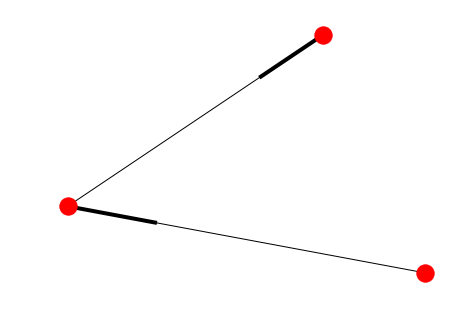

In [41]:
plt.show()
nx.draw(DG)

In [74]:
G=nx.Graph()
G.add_node(1)
G.add_nodes_from(['two','three'])
G.add_nodes_from([4,5])
G.add_edges_from([(1,2),(1,3),(2,3),(4,5)])

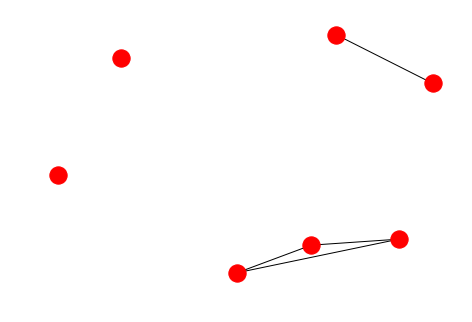

In [77]:
plt.show()
nx.draw(G)

In [95]:
data1=pd.read_csv('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews.csv')
data2=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews2.csv','rU'), encoding='utf-8', engine='c')
data3=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews3.csv','rU'), encoding='utf-8', engine='c')
data4=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews4.csv','rU'), encoding='utf-8', engine='c')
data5=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews5.csv','rU'), encoding='utf-8', engine='c')
data6=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews6.csv','rU'), encoding='utf-8', engine='c')


In [96]:
data3.columns=['Review']

In [161]:
frames=[data1,data2,data3,data4,data5,data6]

In [162]:
data=pd.concat(frames)

In [163]:
data_fin=DataFrame(data['Review'])
data_fin

,Review
0,":P I like you, Merc. You make me laugh! If Mat..."
1,I am surprised that I did not find any discuss...
2,I am surprised that I did not find any discuss...
3,. . .let me see if I am following along correc...
4,". . .now hold on a minute. A ""current"" A6 4.2 ..."
5,but has anyone noticed the front oh the new ac...
6,""""" I think in the luxury car market 10-20% is ..."
7,""""" I think in the luxury car market 10-20% is ..."
8,"...cointunied from previous post...""Globally, ..."
9,"...cointunied from previous post...""Globally, ..."


In [190]:
data=pd.read_csv(open('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Edmunds Reviews2.csv','rU'), encoding='utf-8', engine='c')
data=data[1:1341:]




In [192]:
data=DataFrame(data['Review'])


In [193]:
from nltk.corpus import stopwords
StopWordslist = stopwords.words("english")

def string_process(s):
    s=str(s)
    lower = s.lower()
    words = lower.split()
    refined = []
    for i in words:
        if i not in StopWordslist:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
data['text']=data['Review'].map(string_process)

In [122]:
score=pd.read_csv('/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/Assignment 3 Sentiment Scores.csv')



In [195]:
models=list(score[:0])
models_l=[]
for i in models:
    x=i.lower()
    models_l.append(x)
models_l

['es', 'ls', 'rx', 'a8', 'a6', '3series', '5series', '7series', 'xj', 'sclass']

In [196]:
count_df=DataFrame(data['text'])
for i in models_l:
    count_df[i]=0

In [206]:
count_df

,text,es,ls,rx,a8,a6,3series,5series,7series,xj,sclass
1,surprised find discussionsregarding audi a8 cu...,0,0,0,0,0,0,0,0,0,0
2,surprised find discussionsregarding audi a8 cu...,0,0,0,0,0,0,0,0,0,0
3,let see following along correctly1 new sts u...,0,0,0,0,0,0,0,0,0,0
4,now hold minute current a6 42 fully optioned...,0,0,0,0,0,0,0,0,0,0
5,anyone noticed front oh new accords es300s hon...,0,0,0,0,0,0,0,0,0,0
6,think luxury car market 1020 right vast major...,0,0,0,0,0,0,0,0,0,0
7,think luxury car market 1020 right vast major...,0,0,0,0,0,0,0,0,0,0
8,cointunied previous postglobally lexus selling...,0,0,0,0,0,0,0,0,0,0
9,cointunied previous postglobally lexus selling...,0,0,0,0,0,0,0,0,0,0
10,cointunied previous postglobally lexus selling...,0,0,0,0,0,0,0,0,0,0


In [213]:
def count_brand():
    for num in range(1,len(count_df['text'])):
        for i in models_l:
            if i in count_df['text'][num]:
                count_df.loc[num,i]=1
count_brand()

In [216]:
count_df.drop('text',1, inplace=True)
count_df.loc['Row_sum'] = count_df.apply(lambda x: x.sum())
count_series=count_df.T['Row_sum']
count_series.sort_values(ascending=False)[:10]

es         1285
ls         1235
a8          603
sclass      597
rx          309
7series     283
a6          162
xj          157
3series      88
5series      83
Name: Row_sum, dtype: int64

In [220]:
count_number=count_df.drop('Row_sum')

In [221]:
def lift(a, b):
    total = len(count_number)
    fraq_a = sum(count_number[a])
    fraq_b = sum(count_number[b])
    a_b_df=count_number[[a,b]]
    a_b_df['Col_sum'] = a_b_df.apply(lambda x: x.sum(), axis=1)
    fraq_a_b=len(a_b_df[a_b_df['Col_sum']==2])
    if fraq_a_b==0:
        return .1
    return round((total*fraq_a_b*1.0)/(fraq_a*fraq_b*1.0),2)

In [222]:
top_10=set(count_series.sort_values(ascending=False)[:10].index)
list_10=list(count_series.sort_values(ascending=False)[:10].index)

In [223]:
lift_df=pd.DataFrame(columns=list_10, index=list_10)
for i in list_10:
    for j in list_10:
        lift_df.loc[i,j]=lift(i,j)

In [224]:
lift_df

,es,ls,a8,sclass,rx,7series,a6,xj,3series,5series
es,1.04,1.03,1.02,1.03,1.03,1.04,1,1.03,1.04,1.04
ls,1.03,1.09,1.01,1.07,0.99,1.07,0.88,1.04,1.04,1.03
a8,1.02,1.01,2.22,1.17,0.24,1.52,1.41,1.66,0.58,0.62
sclass,1.03,1.07,1.17,2.24,0.79,1.73,0.68,1.53,1.05,1.03
rx,1.03,0.99,0.24,0.79,4.34,0.69,0.48,0.64,1.92,1.2
7series,1.04,1.07,1.52,1.73,0.69,4.73,0.85,2.08,2.31,2
a6,1,0.88,1.41,0.68,0.48,0.85,8.27,1.05,1.5,2.79
xj,1.03,1.04,1.66,1.53,0.64,2.08,1.05,8.54,0.29,0.93
3series,1.04,1.04,0.58,1.05,1.92,2.31,1.5,0.29,15.23,4.22
5series,1.04,1.03,0.62,1.03,1.2,2,2.79,0.93,4.22,16.14


# EDGE CALC

In [297]:
from itertools import combinations
import pandas as pd
from cStringIO import StringIO
import itertools as iter


In [311]:
# Create DataFrame to fill with combinations
comparison_df = pd.DataFrame(index=score.index)
# Create combinations of columns
for a, b in iter.combinations(score.columns, 2):
    # Subtract column combinations
    comparison_df['{}_{}'.format(a, b)] = score[a] - score[b]
    z= score[a] - score[b]
print (comparison_df)

     ES_LS  ES_RX  ES_A8  ES_A6  ES_3series  ES_5series  ES_7series  ES_XJ  \
0      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
1      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
2      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
3      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
4      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
5      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
6      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
7      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
8      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
9      NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
10     NaN    NaN    NaN    NaN         NaN         NaN         NaN    NaN   
11     NaN    NaN    NaN    NaN         NaN         NaN         

In [339]:
comparison_df['ES_LS'].count()

33

In [327]:
def second_dir(a):
    return a<0

def first_dir(a):
    return a>0
sec=comparison_df.apply(second_dir)
fir=comparison_df.apply(first_dir)

In [421]:
def avg_(a):
    if a.count()>0:
        return sum(a)/a.count()
x=comparison_df[sec].apply(avg_)

In [434]:
lis=[]
for i in x:
    lis.append(x+i)

In [435]:
lis

[ES_LS             -4.000000
 ES_RX             -4.000000
 ES_A8             -5.000000
 ES_A6             -3.666667
 ES_3series        -8.000000
 ES_5series        -7.000000
 ES_7series        -4.800000
 ES_XJ             -3.000000
 ES_Sclass         -4.615385
 LS_RX             -3.142857
 LS_A8             -4.837838
 LS_A6             -3.285714
 LS_3series        -6.000000
 LS_5series        -5.100000
 LS_7series        -4.750000
 LS_XJ             -4.888889
 LS_Sclass         -4.677419
 RX_A8             -3.000000
 RX_A6                   NaN
 RX_3series        -6.000000
 RX_5series              NaN
 RX_7series        -3.000000
 RX_XJ                   NaN
 RX_Sclass         -4.500000
 A8_A6             -5.166667
 A8_3series        -7.000000
 A8_5series        -7.000000
 A8_7series        -5.000000
 A8_XJ             -4.142857
 A8_Sclass         -4.062500
 A6_3series        -7.000000
 A6_5series        -7.000000
 A6_7series        -7.000000
 A6_XJ                   NaN
 A6_Sclass    

In [346]:
comparison_df[fir].apply(avg_)

ES_LS              1.166667
ES_RX              1.666667
ES_A8              3.400000
ES_A6              6.000000
ES_3series         3.250000
ES_5series         4.000000
ES_7series         3.600000
ES_XJ              1.000000
ES_Sclass          3.285714
LS_RX              3.400000
LS_A8              2.857143
LS_A6              3.333333
LS_3series         2.800000
LS_5series         2.700000
LS_7series         2.642857
LS_XJ              2.750000
LS_Sclass          2.554054
RX_A8              2.200000
RX_A6              3.666667
RX_3series         4.000000
RX_5series         3.600000
RX_7series         3.750000
RX_XJ              2.000000
RX_Sclass          3.636364
A8_A6              1.375000
A8_3series         3.250000
A8_5series         3.333333
A8_7series         2.181818
A8_XJ              2.000000
A8_Sclass          2.500000
A6_3series         3.000000
A6_5series         3.000000
A6_7series              NaN
A6_XJ              1.000000
A6_Sclass          2.000000
3series_5series     

# END EDGE CALC.

In [347]:
MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])
MG.degree(weight='weight')

GG=nx.Graph()
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

nx.shortest_path(GG,1,3)


[1, 2, 3]

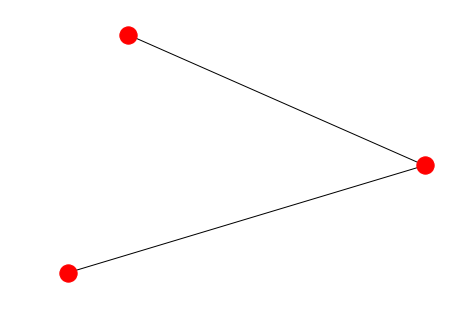

In [349]:
plt.show()
nx.draw(GG)

In [386]:
comparison_df[fir].apply(avg_)

ES_LS              1.166667
ES_RX              1.666667
ES_A8              3.400000
ES_A6              6.000000
ES_3series         3.250000
ES_5series         4.000000
ES_7series         3.600000
ES_XJ              1.000000
ES_Sclass          3.285714
LS_RX              3.400000
LS_A8              2.857143
LS_A6              3.333333
LS_3series         2.800000
LS_5series         2.700000
LS_7series         2.642857
LS_XJ              2.750000
LS_Sclass          2.554054
RX_A8              2.200000
RX_A6              3.666667
RX_3series         4.000000
RX_5series         3.600000
RX_7series         3.750000
RX_XJ              2.000000
RX_Sclass          3.636364
A8_A6              1.375000
A8_3series         3.250000
A8_5series         3.333333
A8_7series         2.181818
A8_XJ              2.000000
A8_Sclass          2.500000
A6_3series         3.000000
A6_5series         3.000000
A6_7series              NaN
A6_XJ              1.000000
A6_Sclass          2.000000
3series_5series     

In [387]:
comparison_df[sec].apply(avg_)

ES_LS             -2.000000
ES_RX             -2.000000
ES_A8             -3.000000
ES_A6             -1.666667
ES_3series        -6.000000
ES_5series        -5.000000
ES_7series        -2.800000
ES_XJ             -1.000000
ES_Sclass         -2.615385
LS_RX             -1.142857
LS_A8             -2.837838
LS_A6             -1.285714
LS_3series        -4.000000
LS_5series        -3.100000
LS_7series        -2.750000
LS_XJ             -2.888889
LS_Sclass         -2.677419
RX_A8             -1.000000
RX_A6                   NaN
RX_3series        -4.000000
RX_5series              NaN
RX_7series        -1.000000
RX_XJ                   NaN
RX_Sclass         -2.500000
A8_A6             -3.166667
A8_3series        -5.000000
A8_5series        -5.000000
A8_7series        -3.000000
A8_XJ             -2.142857
A8_Sclass         -2.062500
A6_3series        -5.000000
A6_5series        -5.000000
A6_7series        -5.000000
A6_XJ                   NaN
A6_Sclass         -2.333333
3series_5series     

In [414]:
product = nx.MultiDiGraph()

In [415]:
H=nx.Graph()
H.add_path(['es','ls','a8','sclass','rx','7series','a6','xj','3series','5series'])
product.add_nodes_from(H)
product.add_edge('es','ls',weight=4000)
product.add_edge('ls','es',weight=2.0)
product.add_edge('es','a8',weight=2)
product.add_edge('es','a8',weight=3.4)
product.add_edge('es','sclass',weight=2)
product.add_edge('es','sclass',weight=1.6)
product.add_edge('es','rx',weight=2)
product.add_edge('es','rx',weight=1.6)
product.add_edge('es','7series',weight=2)
product.add_edge('es','7series',weight=1.6)
product.add_edge('es','a6',weight=2)
product.add_edge('es','a6',weight=1.6)
product.add_edge('es','xj',weight=2)
product.add_edge('es','xj',weight=1.6)
product.add_edge('es','3series',weight=2)
product.add_edge('es','3series',weight=1.6)
product.add_edge('es','5series',weight=2)
product.add_edge('es','5series',weight=1.6)

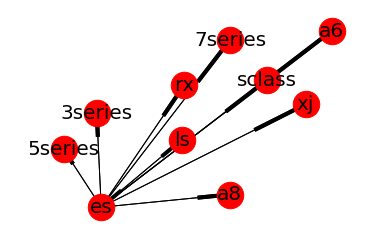

In [417]:
elarge=[(u,v) for (u,v,d) in product.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in product.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(product) # positions for all nodes

#nodes
nx.draw_networkx_nodes(product,pos,node_size=700)

# edges
nx.draw_networkx_edges(product,pos,edgelist=elarge,
                    width=1,arrows=True)
nx.draw_networkx_edges(product,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed',arrows=True)

# labels
nx.draw_networkx_labels(product,pos,font_size=20,font_family='sans-serif')
plt.axis('off')
plt.show()

In [413]:
product.clear()

In [363]:
product.clear

<bound method MultiDiGraph.clear of <networkx.classes.multidigraph.MultiDiGraph object at 0x114331790>>

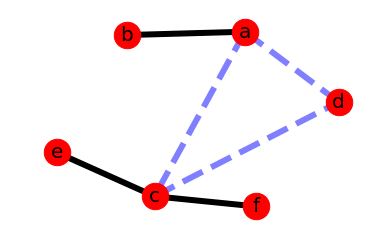

In [365]:
G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [388]:
product.clear()